
# 3.4 AGB modeling and mapping at the tile scale


In [ ]:
#----------------------------------------------#
# Installing packages
#----------------------------------------------#
install.packages("randomForest")
install.packages("raster")
install.packages("data.table")

#----------------------------------------------#
# loading packages and functions
#----------------------------------------------#
library(randomForest)
library(raster)
library(rgdal)
library(data.table)
source("~/above/biomass_models/boreal_functions.R")


In [9]:
#----------------------------------------------#
# Importing datasets
#----------------------------------------------#
# rds models
rds_models<-list.files("~/above/biomass_models/", ".rds", full.names = T)

# adding model ids
models_id<-names(rds_models)<-paste0("m",1:length(rds_models))

# ic2 alt08 path
ice2_30_atl08_path<-"~/jabba/data/atl08_filt_30542_topo_landsat_20210608185216v2.csv"

# stack
topo_stack<-stack("~/jabba/dps_output/Copernicus_30542_covars_cog_topo_stack.tif")
l8_stack<-stack("~/jabba/dps_output/Landsat8_30542_comp_cog_2015-2020_dps.tif")
stack<-crop(l8_stack,extent(topo_stack));stack<-stack(stack,topo_stack)

# output file
output<-"~/jabba/dps_output/AGBmaps_stack.tif"



ERROR: Error in data.frame(values = unlist(unname(x)), ind, stringsAsFactors = FALSE): arguments imply differing number of rows: 1, 0


  |======================================================================| 100%


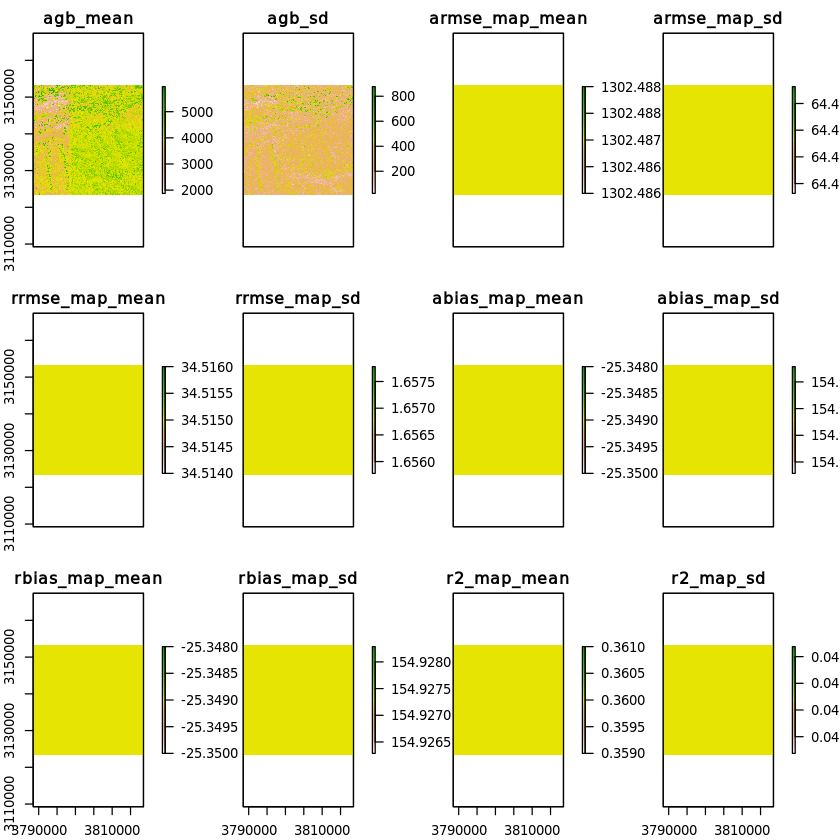

In [17]:
#----------------------------------------------#
# AGB modeling and mapping
#----------------------------------------------#
maps<-mapBoreal(rds_models=rds_models,
                models_id=models_id,
                ice2_30_atl08_path=ice2_30_atl08_path, 
                offset=0,
                s_train=70, 
                rep=10,
                stack=stack,
                strat_random=TRUE,
                output=output)

plot(maps)